## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [94]:
from sklearn.datasets import load_boston

In [95]:
data = load_boston()

In [96]:
X, Y = data['data'], data['target']

In [97]:
# X[:, 5]

In [156]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [157]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [100]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [101]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [102]:
import random

In [103]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is -15.969354777002764, best_b is 86.5304895447656, loss is 1675.6293269365794
when time is 150, best_k is -1.6180645629222186, best_b is -1.6111370227840416, loss is 1277.5963822566093
when time is 200, best_k is 0.15708710391380692, best_b is 0.16140475065872653, loss is 540.3053586469301
when time is 250, best_k is 1.2723441963433566, best_b is 1.2750221510148079, loss is 249.674473712669
when time is 300, best_k is 1.9730158096209531, best_b is 1.9746636110674716, loss is 135.20174320848773
when time is 350, best_k is 2.413219878248334, best_b is 2.414220475452049, loss is 90.17042514152982
when time is 400, best_k is 2.6897825623417257, best_b is 2.690376546896211, loss is 72.49176590069672
when time is 450, best_k is 2.8635358819587817, best_b is 2.863874407980119, loss is 65.57392581157167
when time is 500, best_k is 2.9726981725147685, best_b is 2.9728762041140024, loss is 62.88114932213414
when time is 550, best_k is 3.0412804920105523, best_b is 3.04135

In [104]:
import matplotlib.pyplot as plt

In [155]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

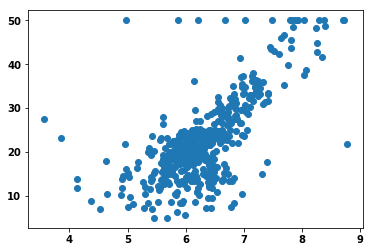

In [106]:
draw_rm_price()

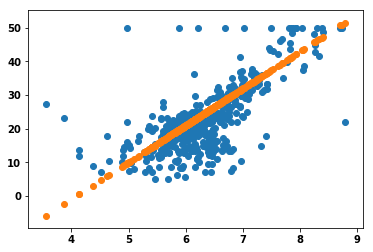

In [107]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [150]:
from collections import defaultdict

In [153]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [152]:
price = defaultdict(int)

In [154]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [112]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [113]:
def example(f, arg):
    return f(arg)

In [114]:
def add_ten(num):
    return num + 10

In [115]:
def mul_ten(num):
    return num * 10 

In [116]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [117]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [118]:
def some_funcion_1(): 
    print('I am function 1')

In [119]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [120]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [121]:
from functools import wraps

In [122]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [123]:
def add_ten(n): return n + 10

In [124]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [125]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [126]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [127]:
add_twenty(9)

29

#### ③ Cutting Problem

In [128]:
solution = {}

In [129]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [130]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [131]:
r(10)

30

In [132]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [133]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [134]:
#r(105)

In [135]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [136]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [137]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [138]:
#r(20)

In [139]:
#r(105)

In [140]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [141]:
r(105)

332

In [142]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [143]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r(n)>

In [144]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [145]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [146]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
    
    return 1 / n * gradient

In [147]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i == y_hat_i:
            continue
        gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
    
    return 1 / n * gradient

In [158]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.5

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    print(k,b)

when time is 0, best_k is -49.45377700361495, best_b is 31.80440069180071, loss is 301.52731317365505
-52.596094197290846 -53.096094197290846
-55.73841139096674 -56.23841139096674
-58.88072858464263 -59.38072858464263
-62.023045778318526 -62.523045778318526
-65.16536297199443 -65.66536297199443
-68.30768016567032 -68.80768016567032
-71.44999735934621 -71.94999735934621
-74.5923145530221 -75.0923145530221
-77.734631746698 -78.234631746698
-80.8769489403739 -81.3769489403739
-84.01926613404979 -84.51926613404979
-87.16158332772568 -87.66158332772568
-90.30390052140157 -90.80390052140157
-93.44621771507747 -93.94621771507747
-96.58853490875336 -97.08853490875336
-99.73085210242925 -100.23085210242925
-102.87316929610515 -103.37316929610515
-106.01548648978104 -106.51548648978104
-109.15780368345693 -109.65780368345693
-112.30012087713283 -112.80012087713283
-115.44243807080872 -115.94243807080872
-118.58475526448461 -119.08475526448461
-121.7270724581605 -122.2270724581605
-124.8693896518

-769.0444143553991 -769.5444143553991
-772.186731549075 -772.686731549075
-775.329048742751 -775.829048742751
-778.4713659364269 -778.9713659364269
-781.6136831301028 -782.1136831301028
-784.7560003237787 -785.2560003237787
-787.8983175174546 -788.3983175174546
-791.0406347111306 -791.5406347111306
-794.1829519048065 -794.6829519048065
-797.3252690984824 -797.8252690984824
-800.4675862921583 -800.9675862921583
-803.6099034858343 -804.1099034858343
-806.7522206795102 -807.2522206795102
-809.8945378731861 -810.3945378731861
-813.036855066862 -813.536855066862
-816.1791722605379 -816.6791722605379
-819.3214894542139 -819.8214894542139
-822.4638066478898 -822.9638066478898
-825.6061238415657 -826.1061238415657
-828.7484410352416 -829.2484410352416
-831.8907582289175 -832.3907582289175
-835.0330754225935 -835.5330754225935
-838.1753926162694 -838.6753926162694
-841.3177098099453 -841.8177098099453
-844.4600270036212 -844.9600270036212
-847.6023441972972 -848.1023441972972
-850.7446613909731

-1988.263485501622 -1988.763485501622
-1991.4058026952978 -1991.9058026952978
-1994.5481198889736 -1995.0481198889736
-1997.6904370826494 -1998.1904370826494
-2000.8327542763252 -2001.3327542763252
-2003.975071470001 -2004.475071470001
-2007.1173886636768 -2007.6173886636768
-2010.2597058573526 -2010.7597058573526
-2013.4020230510284 -2013.9020230510284
-2016.5443402447042 -2017.0443402447042
-2019.68665743838 -2020.18665743838
-2022.8289746320559 -2023.3289746320559
-2025.9712918257317 -2026.4712918257317
-2029.1136090194075 -2029.6136090194075
-2032.2559262130833 -2032.7559262130833
-2035.398243406759 -2035.898243406759
-2038.540560600435 -2039.040560600435
-2041.6828777941107 -2042.1828777941107
-2044.8251949877865 -2045.3251949877865
-2047.9675121814623 -2048.467512181462
-2051.1098293751384 -2051.6098293751384
-2054.252146568814 -2054.752146568814
-2057.39446376249 -2057.89446376249
-2060.536780956166 -2061.036780956166
-2063.6790981498416 -2064.1790981498416
-2066.8214153435174 -

-2682.715585303976 -2683.215585303976
-2685.8579024976516 -2686.3579024976516
-2689.0002196913274 -2689.5002196913274
-2692.142536885003 -2692.642536885003
-2695.284854078679 -2695.784854078679
-2698.427171272355 -2698.927171272355
-2701.5694884660306 -2702.0694884660306
-2704.7118056597064 -2705.2118056597064
-2707.8541228533823 -2708.3541228533823
-2710.996440047058 -2711.496440047058
-2714.138757240734 -2714.638757240734
-2717.2810744344097 -2717.7810744344097
-2720.4233916280855 -2720.9233916280855
-2723.5657088217613 -2724.0657088217613
-2726.708026015437 -2727.208026015437
-2729.850343209113 -2730.350343209113
-2732.9926604027887 -2733.4926604027887
-2736.1349775964645 -2736.6349775964645
-2739.2772947901403 -2739.7772947901403
-2742.419611983816 -2742.919611983816
-2745.561929177492 -2746.061929177492
-2748.7042463711678 -2749.2042463711678
-2751.8465635648436 -2752.3465635648436
-2754.9888807585194 -2755.4888807585194
-2758.131197952195 -2758.631197952195
-2761.273515145871 -27

-3348.886830363247 -3349.386830363247
-3352.029147556923 -3352.529147556923
-3355.1714647505987 -3355.6714647505987
-3358.3137819442745 -3358.8137819442745
-3361.4560991379503 -3361.9560991379503
-3364.598416331626 -3365.098416331626
-3367.740733525302 -3368.240733525302
-3370.8830507189778 -3371.3830507189778
-3374.0253679126536 -3374.5253679126536
-3377.1676851063294 -3377.6676851063294
-3380.310002300005 -3380.810002300005
-3383.452319493681 -3383.952319493681
-3386.594636687357 -3387.094636687357
-3389.7369538810326 -3390.2369538810326
-3392.8792710747084 -3393.3792710747084
-3396.021588268384 -3396.521588268384
-3399.16390546206 -3399.66390546206
-3402.306222655736 -3402.806222655736
-3405.4485398494116 -3405.9485398494116
-3408.5908570430875 -3409.0908570430875
-3411.7331742367633 -3412.2331742367633
-3414.875491430439 -3415.375491430439
-3418.017808624115 -3418.517808624115
-3421.1601258177907 -3421.6601258177907
-3424.3024430114665 -3424.8024430114665
-3427.4447602051423 -3427.

-4608.956025027246 -4609.456025027246
-4612.098342220922 -4612.598342220922
-4615.240659414598 -4615.740659414598
-4618.382976608274 -4618.882976608274
-4621.525293801949 -4622.025293801949
-4624.667610995625 -4625.167610995625
-4627.809928189301 -4628.309928189301
-4630.952245382977 -4631.452245382977
-4634.094562576653 -4634.594562576653
-4637.236879770328 -4637.736879770328
-4640.379196964004 -4640.879196964004
-4643.52151415768 -4644.02151415768
-4646.663831351356 -4647.163831351356
-4649.806148545032 -4650.306148545032
-4652.9484657387075 -4653.4484657387075
-4656.090782932383 -4656.590782932383
-4659.233100126059 -4659.733100126059
-4662.375417319735 -4662.875417319735
-4665.517734513411 -4666.017734513411
-4668.6600517070865 -4669.1600517070865
-4671.802368900762 -4672.302368900762
-4674.944686094438 -4675.444686094438
-4678.087003288114 -4678.587003288114
-4681.22932048179 -4681.72932048179
-4684.3716376754655 -4684.8716376754655
-4687.513954869141 -4688.013954869141
-4690.6562

-5290.8388560548965 -5291.3388560548965
-5293.981173248572 -5294.481173248572
-5297.123490442248 -5297.623490442248
-5300.265807635924 -5300.765807635924
-5303.4081248296 -5303.9081248296
-5306.5504420232755 -5307.0504420232755
-5309.692759216951 -5310.192759216951
-5312.835076410627 -5313.335076410627
-5315.977393604303 -5316.477393604303
-5319.119710797979 -5319.619710797979
-5322.262027991655 -5322.762027991655
-5325.40434518533 -5325.90434518533
-5328.546662379006 -5329.046662379006
-5331.688979572682 -5332.188979572682
-5334.831296766358 -5335.331296766358
-5337.973613960034 -5338.473613960034
-5341.115931153709 -5341.615931153709
-5344.258248347385 -5344.758248347385
-5347.400565541061 -5347.900565541061
-5350.542882734737 -5351.042882734737
-5353.685199928413 -5354.185199928413
-5356.8275171220885 -5357.3275171220885
-5359.969834315764 -5360.469834315764
-5363.11215150944 -5363.61215150944
-5366.254468703116 -5366.754468703116
-5369.396785896792 -5369.896785896792
-5372.53910309

In [ ]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [ ]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [160]:
solution = dict()

In [164]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = (string1[:-1], string2)
    elif operation.startswith("Add"):
        solution[(string1, string2)] = (string1, string2[:-1])
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = (string1[:-1], string2[:-1])
    else:
         solution[(string1, string2)] = (string1[:-1], string2[:-1])
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [165]:
edit_distance('ABCDE', 'ABCCEF')

2

In [166]:
solution

{('A', 'A'): ('', ''),
 ('A', 'AB'): ('A', 'A'),
 ('A', 'ABC'): ('A', 'AB'),
 ('A', 'ABCC'): ('A', 'ABC'),
 ('A', 'ABCCE'): ('A', 'ABCC'),
 ('A', 'ABCCEF'): ('A', 'ABCCE'),
 ('AB', 'A'): ('A', 'A'),
 ('AB', 'AB'): ('A', 'A'),
 ('AB', 'ABC'): ('AB', 'AB'),
 ('AB', 'ABCC'): ('AB', 'ABC'),
 ('AB', 'ABCCE'): ('AB', 'ABCC'),
 ('AB', 'ABCCEF'): ('AB', 'ABCCE'),
 ('ABC', 'A'): ('AB', 'A'),
 ('ABC', 'AB'): ('AB', 'AB'),
 ('ABC', 'ABC'): ('AB', 'AB'),
 ('ABC', 'ABCC'): ('ABC', 'ABC'),
 ('ABC', 'ABCCE'): ('ABC', 'ABCC'),
 ('ABC', 'ABCCEF'): ('ABC', 'ABCCE'),
 ('ABCD', 'A'): ('ABC', 'A'),
 ('ABCD', 'AB'): ('ABC', 'AB'),
 ('ABCD', 'ABC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCC'): ('ABC', 'ABC'),
 ('ABCD', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCD', 'ABCCEF'): ('ABCD', 'ABCCE'),
 ('ABCDE', 'A'): ('ABCD', 'A'),
 ('ABCDE', 'AB'): ('ABCD', 'AB'),
 ('ABCDE', 'ABC'): ('ABCD', 'ABC'),
 ('ABCDE', 'ABCC'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCE'): ('ABCD', 'ABCC'),
 ('ABCDE', 'ABCCEF'): ('ABCDE', 'ABCCE')}

In [188]:
res = []
def parse_solution(string1 ,string2, solution):
    res.append((string1,string2))
    left_string1, right_string2 = solution[(string1, string2)]
    
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [189]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [190]:
res

[('ABCDE', 'ABCCEF'),
 ('ABCDE', 'ABCCE'),
 ('ABCD', 'ABCC'),
 ('ABC', 'ABC'),
 ('AB', 'AB'),
 ('A', 'A')]

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [ ]:
import random
import matplotlib.pylab as plt

In [ ]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

In [ ]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [ ]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro